### DTW by nipunbatra.github.io

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

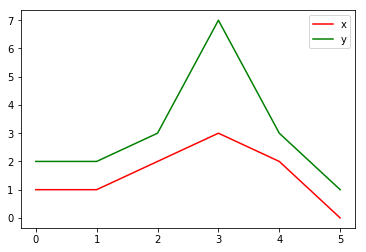

In [28]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([2, 2, 3, 7, 3, 1])

plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend()

In [31]:
distances = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-y[i])**2  
distances

array([[ 1.,  1.,  0.,  1.,  0.,  4.],
       [ 1.,  1.,  0.,  1.,  0.,  4.],
       [ 4.,  4.,  1.,  0.,  1.,  9.],
       [36., 36., 25., 16., 25., 49.],
       [ 4.,  4.,  1.,  0.,  1.,  9.],
       [ 0.,  0.,  1.,  4.,  1.,  1.]])

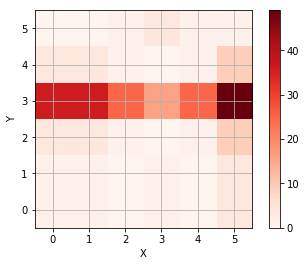

In [32]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar()
distance_cost_plot(distances)

In [33]:
accumulated_cost = np.zeros((len(y), len(x)))
accumulated_cost

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [34]:
accumulated_cost[0,0] = distances[0,0]
accumulated_cost

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

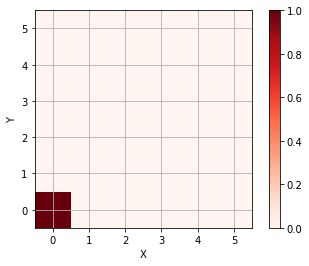

In [35]:
distance_cost_plot(accumulated_cost)

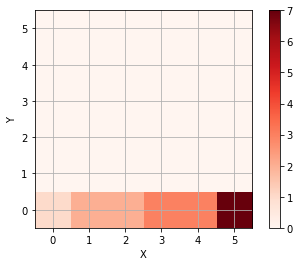

In [36]:
for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]   
distance_cost_plot(accumulated_cost)

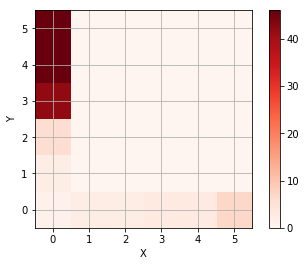

In [37]:
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]    
distance_cost_plot(accumulated_cost)

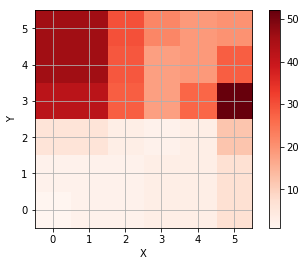

In [38]:
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
distance_cost_plot(accumulated_cost)

In [39]:
path = [[len(x)-1, len(y)-1]]
i = len(y)-1
j = len(x)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])
path

[[5, 5], [4, 5], [3, 4], [3, 3], [3, 2], [2, 1], [2, 0], [0, 0]]

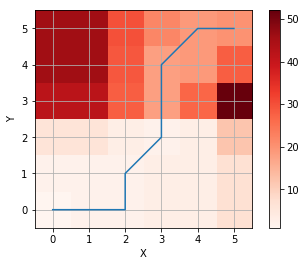

In [40]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y)

In [41]:
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost    

path, cost = path_cost(x, y, accumulated_cost, distances)
print(path)
print(cost)

[[5, 5], [4, 5], [3, 4], [3, 3], [3, 2], [2, 1], [2, 0], [0, 0]]
19.0


### dtw by mlpy

In [21]:
import mlpy
dist, cost, path = mlpy.dtw_std(x, y, dist_only=False)

import matplotlib.cm as cm
fig = plt.figure(1)
ax = fig.add_subplot(111)
plot1 = plt.imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot2 = plt.plot(path[0], path[1], 'w')
xlim = ax.set_xlim((-0.5, cost.shape[0]-0.5))
ylim = ax.set_ylim((-0.5, cost.shape[1]-0.5))

ModuleNotFoundError: No module named 'mlpy'